In [2]:
# Decision Tree Classifier
from sklearn import datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

In [3]:
# load the iris datasets
# for info on this dataset, refer to the logistic_regression script
dataset = datasets.load_iris()

In [4]:
#Let us now build a pandas dataframe hosting the data at hand

# We first need the list of feature names for our columns
# It is already stored in the dataset. Let's use it
lfeat = dataset.feature_names 

In [5]:
# We now build the Dataframe, with the data as argument
# and the list of column names as keyword argument
df_iris = pd.DataFrame(dataset.data, columns = lfeat)

In [7]:
print "Printing data up to the 5th sample"
df_iris.iloc[:5,:] # Look at the first 5 samples for all features.

Printing data up to the 5th sample


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
# We also want to add the regression target
# Let's create a new column :
df_iris["Species"] = dataset.target # Must have the correct size of course

In [9]:
#Let's review our complete dataframe:
print
print "Printing data up to the 5th sample"
print "Also print the target"
df_iris.iloc[:5,:] # Look at the first 5 samples for all features incuding target


Printing data up to the 5th sample
Also print the target


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
# we are now going to fit a Decision Tree model to the data

# Let's use an example to understand what decision trees do
# Picture a doctor and his sick patient
# The doctor follows a protocol to find out what ails the patient
# He may ask : how old are you, where does it hurt and so on
# This will allow him to narrow down the options and eventually
# find out the problem

# Decision trees proceed in the same way :
# They make a series of separation in the feature space
# e.g. if feat1 > c => classify as class 1
# The features on which to make the separation and the threshold value
# are learnt on the training data  by optimising a criterion like minimising the classification error at each split

#As before, we create an instance of the model
model = DecisionTreeClassifier()

In [11]:
# Which we then fit to the training data X, Y
# with pandas we have to split the df in two :
# the feature part (X) and the target part (Y)
# This is done below :

data = df_iris[lfeat].values
target = df_iris["Species"].values
model.fit(data, target)
print(model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [12]:
# make predictions
# as before, we can use the model to make predictions on any data
expected = target
predicted = model.predict(data)
# and evaluate the performance of the classification with standard metrics
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       1.00      1.00      1.00        50
          2       1.00      1.00      1.00        50

avg / total       1.00      1.00      1.00       150

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


In [ ]:
# This time we can see we got a perfect prediction - again

# Decision surface of a decision tree using paired features

An example of plotting a 

http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html

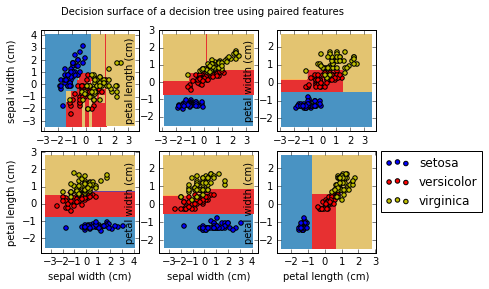

In [19]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()